In [27]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib ipympl

In [28]:
# Grid size, I think
number_grids = 64

First: we plot the flood at the final timestep

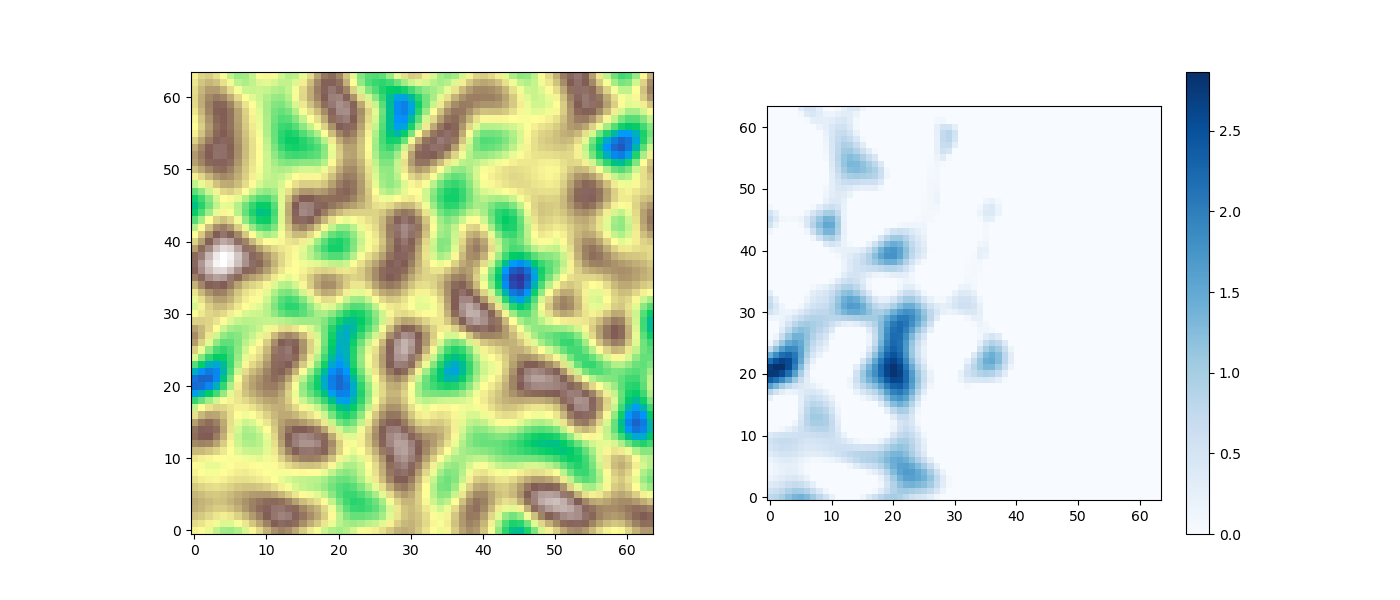

In [29]:
# This code was adapted from Roberto Bentivoglio's Github: 
# https://github.com/RBTV1/SWE-GNN-paper-repository-/blob/main/database/D-Hydro%20simulations.ipynb

sim = 12
save_folder = "data/raw_datasets/"

fig, axs = plt.subplots(1,2,figsize=(14,6))
axs[0].imshow(np.loadtxt(f"{save_folder}\\DEM\\DEM_{sim}.txt")[:, 2].reshape(number_grids,number_grids), cmap='terrain', origin='lower');
plt.imshow(np.loadtxt(f"{save_folder}\\WD\\WD_{sim}.txt")[-1].reshape(number_grids,number_grids), cmap='Blues', origin='lower');
plt.colorbar()

Now: let's create a video

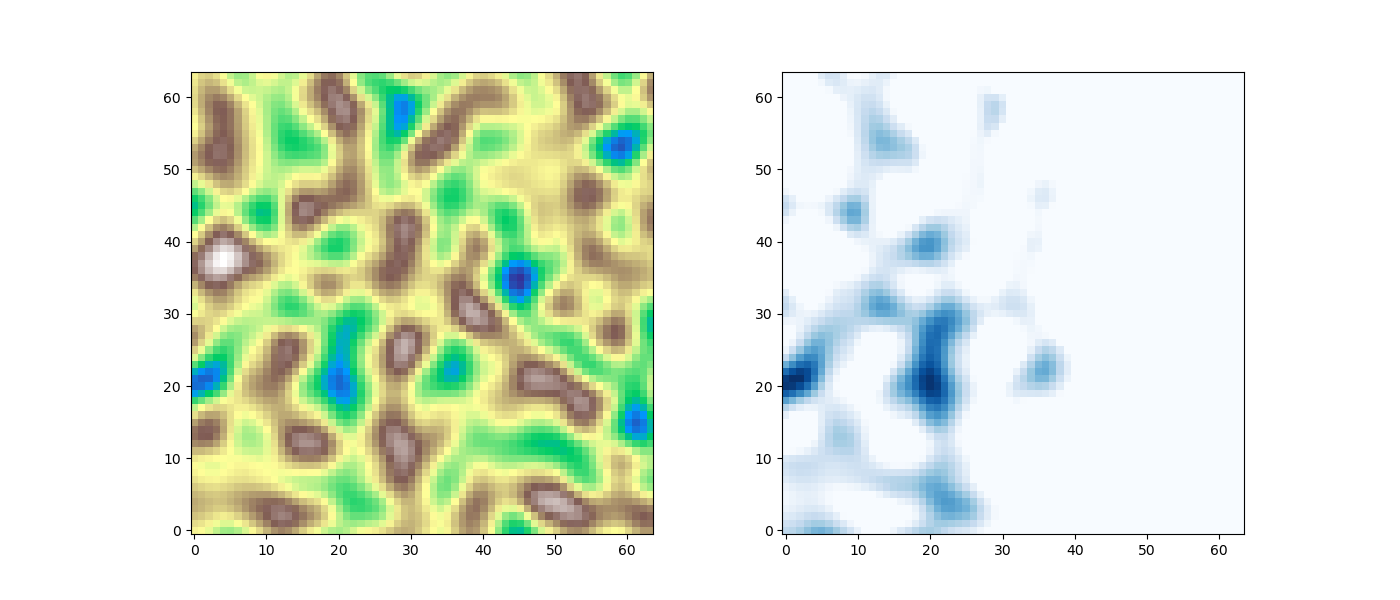

In [33]:
from IPython.display import HTML
import matplotlib.animation as animation

# Load data
topo = np.loadtxt(f"{save_folder}\\DEM\\DEM_{sim}.txt")[:, 2].reshape(number_grids,number_grids)
vals = np.loadtxt(f"{save_folder}\\WD\\WD_{sim}.txt").reshape(-1,number_grids,number_grids)

fig, axs = plt.subplots(1,2,figsize=(14,6))
axs[0].imshow(topo, cmap='terrain', origin='lower')

# Create list of images that are animated
imgs = []
for i in range(vals.shape[0]):
    im = axs[1].imshow(vals[i], cmap='Blues', origin='lower', animated=True)

    if i==0:
        axs[1].imshow(vals[i], cmap='Blues', origin='lower')
    imgs.append([im])

# Create the animation
ani = animation.ArtistAnimation(fig, imgs, interval=50, blit=True,
                                repeat_delay=1000);